In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127367000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706713008000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706709062000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv/', name='clinicaltrial_2020.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1713448318000),
 FileInfo(path='d

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp")

True

In [0]:
%sh
ls /tmp/

Rserv
RtmpVk99kV
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-440b16e42b624966b948e0ac37fab276-systemd-logind.service-cVWGXV
systemd-private-440b16e42b624966b948e0ac37fab276-systemd-resolved.service-r0a4DZ
tmp.fhAp1C988J


In [0]:
%sh
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
%sh
ls /tmp/clinicaltrial_2023.csv 

/tmp/clinicaltrial_2023.csv


In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023.csv")

True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/clinicaltrial_2023.csv", True)

True

In [0]:
dbutils.fs.ls("/FileStore/tables/clinicaltrial_2023.csv")

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714476778000)]

In [0]:
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp")

True

In [0]:
%sh
ls /tmp/

Rserv
RtmpVk99kV
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-440b16e42b624966b948e0ac37fab276-systemd-logind.service-cVWGXV
systemd-private-440b16e42b624966b948e0ac37fab276-systemd-resolved.service-r0a4DZ
tmp.fhAp1C988J


In [0]:
%sh
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
ls /tmp/pharma.csv 

/tmp/pharma.csv


In [0]:
dbutils.fs.mkdirs("FileStore/tables/pharma.csv")

True

In [0]:
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/pharma.csv", True)

True

In [0]:
dbutils.fs.ls("FileStore/tables/pharma.csv/")

[FileInfo(path='dbfs:/FileStore/tables/pharma.csv/pharma.csv', name='pharma.csv', size=678999, modificationTime=1714476882000)]

Task 1: Distinct Studies

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, countDistinct, desc

spark = SparkSession.builder.appName("Clinical Trials Analysis").getOrCreate()

In [0]:
clinicaltrial_2023_df = spark.read.option("header", "true").csv("/FileStore/tables/clinicaltrial_2023.csv")

In [0]:
pharma_df = spark.read.option("header", "true").csv("/FileStore/tables/pharma.csv")

In [0]:
clinicaltrial_2023_df.createOrReplaceTempView("clinicaltrial_2023")
pharma_df.createOrReplaceTempView("pharma")

In [0]:
clinicaltrial_2023_df.printSchema()

root
 |-- Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = tru

In [0]:
from pyspark.sql.functions import col, split

# Defining the actual column name and replacing it with a proper name to avoid syntax issues
column_name = "`Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion`"

# Define the names of the new columns based on the expected structure
column_names = [
    "Id", "Study Title", "Acronym", "Status", "Conditions",
    "Interventions", "Sponsor", "Collaborators", "Enrollment",
    "Funder Type", "Type", "Study Design", "Start", "Completion"
]

# Split the single column into multiple columns based on the tab (\t) separator
for index, name in enumerate(column_names):
    clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn(name, split(col(column_name), "\t").getItem(index))

# Drop the original column that contained all the data
clinicaltrial_2023_df = clinicaltrial_2023_df.drop(column_name)

# Show the schema to confirm the columns have been created correctly
clinicaltrial_2023_df.printSchema()


root
 |-- Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = tru

In [0]:
from pyspark.sql.functions import countDistinct

# Using DataFrame API to count distinct StudyID
distinct_studies_df = clinicaltrial_2023_df.select(countDistinct("Study Title").alias("Distinct_Studies"))
distinct_studies_df.show()

+----------------+
|Distinct_Studies|
+----------------+
|          469788|
+----------------+



Question 2

In [0]:
clinicaltrial_2023_df.createOrReplaceTempView("clinicaltrial_2023")

In [0]:
study_types_df = clinicaltrial_2023_df.groupBy("Type").count().withColumnRenamed("count", "Frequency").orderBy(desc("Frequency"))
study_types_df.show()

+---------------+---------+
|           Type|Frequency|
+---------------+---------+
| INTERVENTIONAL|   230984|
|           NULL|   180459|
|  OBSERVATIONAL|    71499|
|               |      889|
|EXPANDED_ACCESS|      559|
+---------------+---------+



Question 3

In [0]:
from pyspark.sql.functions import desc

top_conditions_df = clinicaltrial_2023_df.groupBy("Conditions").count().withColumnRenamed("count", "Frequency").orderBy(desc("Frequency")).limit(5)
top_conditions_df.show()


+-----------------+---------+
|       Conditions|Frequency|
+-----------------+---------+
|             NULL|    41024|
|          Healthy|     6665|
|    Breast Cancer|     4138|
|Diabetes Mellitus|     3333|
|             Pain|     2562|
+-----------------+---------+



Question 4

In [0]:
pharma_companies = pharma_df.select("Parent_Company").distinct()
top_sponsors_df = clinicaltrial_2023_df.join(pharma_companies, clinicaltrial_2023_df.Sponsor == pharma_companies.Parent_Company, "left_anti").groupBy("Sponsor").count().withColumnRenamed("count", "Trials").orderBy(desc("Trials")).limit(10)
top_sponsors_df.show()


+--------------------+------+
|             Sponsor|Trials|
+--------------------+------+
|                NULL| 95209|
| University Hospital|  8363|
|University of Cal...|  4100|
|   Assiut University|  2913|
|    Cairo University|  2570|
|Assistance Publiq...|  2539|
|         Mayo Clinic|  2328|
|National Cancer I...|  2325|
|M.D. Anderson Can...|  2181|
|Massachusetts Gen...|  1979|
+--------------------+------+



Question 5

In [0]:
from pyspark.sql.functions import col, substring, date_format, to_date

# Aggregating data using DataFrame operations
completed_studies_df = clinicaltrial_2023_df \
    .filter(col("Completion").startswith("2023")) \
    .groupBy(substring(col("Completion"), 1, 7).alias("MonthNumeric")) \
    .count() \
    .withColumnRenamed("count", "CompletedStudies") \
    .withColumn("Month", date_format(to_date(col("MonthNumeric"), "yyyy-MM"), "MMMM")) \
    .orderBy("MonthNumeric") \
    .drop("MonthNumeric")

completed_studies_df.show()


+----------------+---------+
|CompletedStudies|    Month|
+----------------+---------+
|            1294|  January|
|            1046| February|
|            1471|    March|
|            1170|    April|
|            1287|      May|
|            1789|     June|
|            1375|     July|
|            1346|   August|
|            1432|September|
|            1313|  October|
|            1150| November|
|            4666| December|
+----------------+---------+



In [0]:
completed_studies_df_pd = completed_studies_df.toPandas()


In [0]:
pip install matplotlib

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
%matplotlib inline


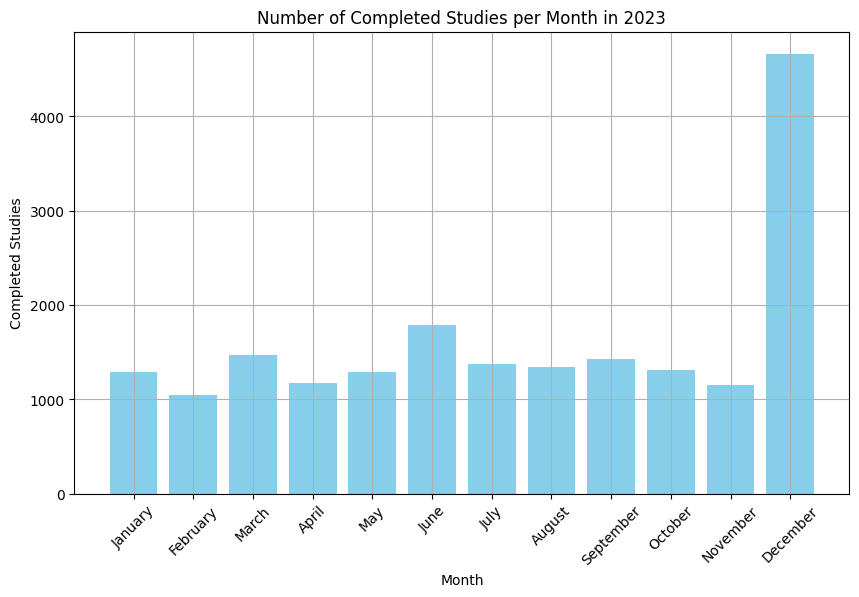

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming completed_studies_df_pd is your Pandas DataFrame obtained from the Spark DataFrame
# Convert Spark DataFrame to Pandas DataFrame for visualization (only if not already converted)
completed_studies_df_pd = completed_studies_df.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(completed_studies_df_pd['Month'], completed_studies_df_pd['CompletedStudies'], color='skyblue')
plt.title('Number of Completed Studies per Month in 2023')
plt.xlabel('Month')
plt.ylabel('Completed Studies')
plt.xticks(rotation=45)
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()


Extra features to be implemented for extra marks



Visualisation

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark Session (usually not needed in Databricks as it's pre-configured)
spark = SparkSession.builder.appName("ClinicalTrialsVisualization").getOrCreate()


Distribution of studies by condition

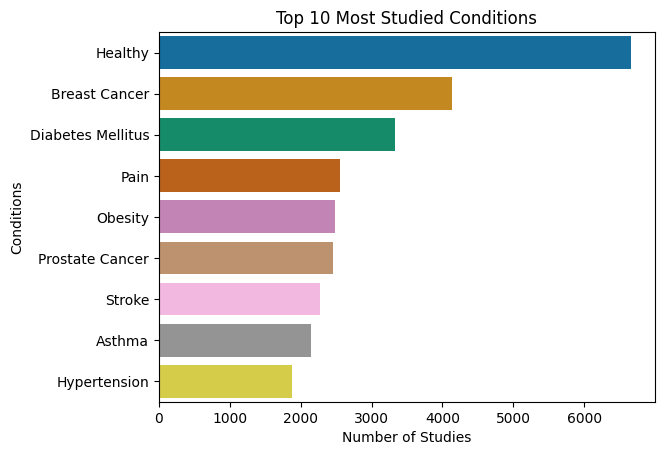

In [0]:
from pyspark.sql.functions import desc

# Group by Conditions, count, and sort in descending order
condition_counts = clinicaltrial_2023_df.groupby("Conditions").count().orderBy(desc("count"))

# Collect top 10 conditions to the driver for visualization (assuming manageable size for visualization)
condition_counts_pd = condition_counts.limit(10).toPandas()

# Visualize using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=condition_counts_pd, x="count", y="Conditions", palette="colorblind")
plt.title('Top 10 Most Studied Conditions')
plt.xlabel('Number of Studies')
plt.ylabel('Conditions')
plt.show()


Studies by Funder Type

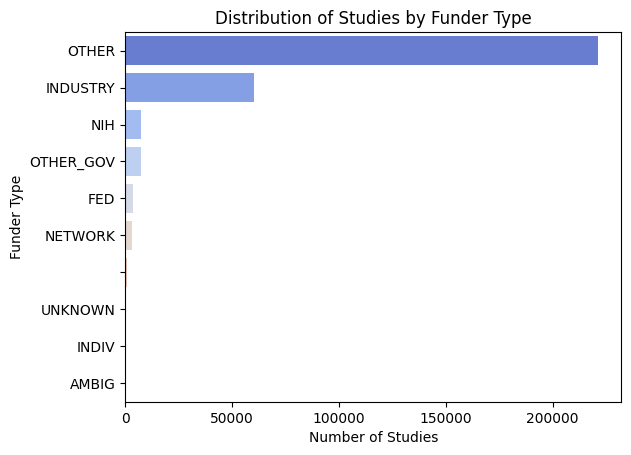

In [0]:
funder_type_counts = clinicaltrial_2023_df.groupby("Funder Type").count().orderBy(desc("count"))

# Collect the data to Pandas for visualization
funder_type_counts_pd = funder_type_counts.toPandas()

# Plotting using Seaborn
sns.barplot(data=funder_type_counts_pd, y="Funder Type", x="count", palette="coolwarm")
plt.title('Distribution of Studies by Funder Type')
plt.xlabel('Number of Studies')
plt.ylabel('Funder Type')
plt.show()


Timeline of study status

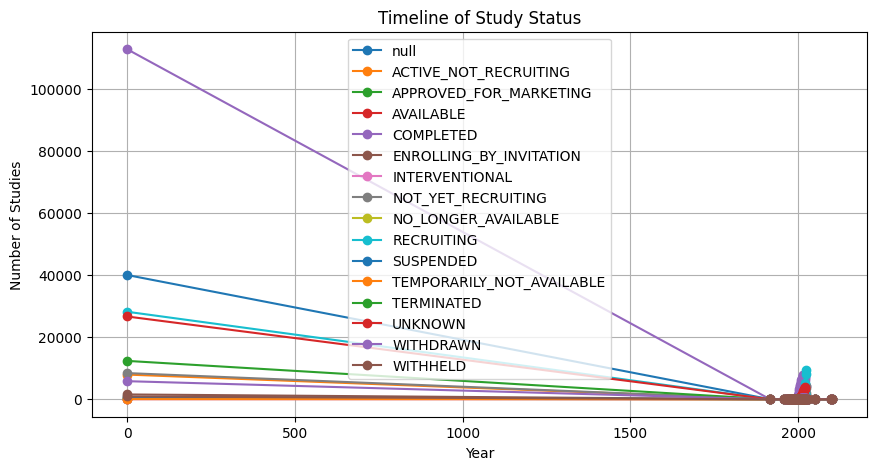

In [0]:
from pyspark.sql.functions import to_date, year

# Ensure 'Start' is a date column and extract the year
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Start", to_date("Start"))
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Year", year("Start"))

# Group by Year and Status, then pivot
status_timeline = clinicaltrial_2023_df.groupby("Year", "Status").count()
status_timeline_pivot = status_timeline.groupBy("Year").pivot("Status").sum("count").na.fill(0)

# Collect and plot
status_timeline_pd = status_timeline_pivot.orderBy("Year").toPandas()
status_timeline_pd.set_index("Year").plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Timeline of Study Status')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()


Implementing Spark functions

String functions

In [0]:
from pyspark.sql.functions import substring

# Extracting the first 10 characters from 'Study Title'
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Title_Short", substring("Study Title", 1, 10))

# Display the modified DataFrame
clinicaltrial_2023_df.select("Study Title", "Title_Short").show()


+--------------------+-----------+
|         Study Title|Title_Short|
+--------------------+-----------+
|Effectiveness of ...| Effectiven|
|Oral Ketone Monoe...| Oral Keton|
|Impact of Tight G...| Impact of |
|New Prognostic Pr...| New Progno|
|InTake Care: Deve...| InTake Car|
|Tailored Inhibito...| Tailored I|
|Neuromodulation o...| Neuromodul|
|Computerized Brie...| Computeriz|
|Manitoba Pharmaci...| Manitoba P|
|Molecular Testing...| Molecular |
|A Pilot Study Exp...| A Pilot St|
|Biology of Juveni...| Biology of|
|Safety and Blood ...| Safety and|
|Promoting Wellbei...| Promoting |
|Reversal of the A...| Reversal o|
|Neural Stem Cell ...| Neural Ste|
|RCT of the Effect...| RCT of the|
|Comparison Betwee...| Comparison|
|Developing a Stan...| Developing|
|Interleukin-2 and...| Interleuki|
+--------------------+-----------+
only showing top 20 rows



ARRAY Functions

In [0]:
from pyspark.sql.functions import split

# Split the 'Conditions' column into an array of conditions
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Conditions_Array", split(col("Conditions"), "; "))

# Display the modified DataFrame
clinicaltrial_2023_df.select("Conditions", "Conditions_Array").show(truncate=False)


+------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------+
|Conditions                                                                                      |Conditions_Array                                                                                  |
+------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------+
|Mental Health Issue (E.G.                                                                       |[Mental Health Issue (E.G.]                                                                       |
|Cerebrovascular Function|Cognition                                                              |[Cerebrovascular Function|Cognition]                                                              |
|Myocardia

Loading the Data of Clinicaltrial_2020 and clinicaltrial_2021

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127367000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706713008000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706709062000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv/', name='clinicaltrial_2020.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1713448318000),
 FileInfo(path='d

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp")

True

In [0]:
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp")

True

In [0]:
%sh
unzip -d /tmp/  /tmp/clinicaltrial_2021.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
%sh
unzip -d /tmp/  /tmp/clinicaltrial_2020.zip


Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  


In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2020.csv")

True

In [0]:
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2021.csv")

True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/clinicaltrial_2020.csv", True)

True

In [0]:
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/clinicaltrial_2021.csv", True)

True

Reusable code of Clinicaltrial_2023

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127367000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706713008000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706709062000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv/', name='clinicaltrial_2020.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1713448318000),
 FileInfo(path='d

In [0]:
fileroot = "clinicaltrial_2023"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
import os

os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp/ /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot + ".csv", True)

True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot)

[]

In [0]:
dbutils.fs.ls("FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127367000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706713008000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706709062000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.csv/', name='clinicaltrial_2020.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020.zip', name='clinicaltrial_2020.zip', size=10599182, modificationTime=1713448318000),
 FileInfo(path='d

In [0]:
fileroot = "clinicaltrial_2021"
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp")

True

In [0]:
import os

os.environ['fileroot'] = fileroot

In [0]:
%sh
unzip -d /tmp/ /tmp/$fileroot.zip

Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)

True

In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot + ".csv", True)

True

In [0]:
dbutils.fs.rm("/FileStore/tables/" + fileroot  + ".zip")

True

In [0]:
dbutils.fs.ls("/FileStore/tables/" + fileroot)

[]